<a href="https://colab.research.google.com/github/Badri1903/TSF-Task2-Unsupervised-ML/blob/main/TSF_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BADRINATH M
THE SPARKS FOUNDATION

Data science and Business Analytics Intern

---

#TASK - 2: **Prediction using Unsupervised ML**
##  From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

* **Dataset**: [Iris](https://bit.ly/3kXTdox)
* **IDE**: *Google Colaboratory Notebook*
* **Language**: *Python*
---

## Importing necessary Python Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## Importing Iris dataset
> Iris dataset can be imported either by using the in-built sklearn dataset or by reading the external dataset link using pandas.

> Here sklearn is used for importing the dataset

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns= iris.feature_names)
x = df
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Finding optimal number of Clusters using Elbow method

In [ ]:
from sklearn.cluster import KMeans

wss = []    #Within Cluster Sum of Squares
cluster_range = range(1, 10)

for k in cluster_range:
  km = KMeans(n_clusters = k)
  km.fit(x)
  inertia = km.inertia_
  wss.append(inertia)

print(wss)

[681.3706, 152.34795176035792, 78.85144142614601, 57.228473214285714, 46.472230158730156, 39.03998724608725, 34.62008318478907, 30.185072738664847, 28.174278138528145]


Visualising the graph of elbow method

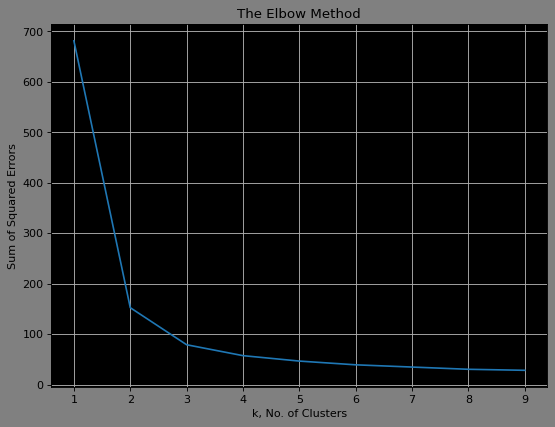

In [ ]:
plt.figure(facecolor= 'grey', figsize=(8, 6), dpi=80)
plt.axes().set_facecolor('black')

plt.plot(cluster_range, wss)

plt.title('The Elbow Method')
plt.xlabel('k, No. of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.grid()

# The above graph resembing the elbow shows that the NUMBER OF CLUSTERS is '***3***'

## Creating K-means classifier

In [ ]:
x = x.iloc[:, [0, 1, 2, 3]].values
km = KMeans(n_clusters = 3)
y_kmeans = km.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

## Visualising the clusters along with centroids

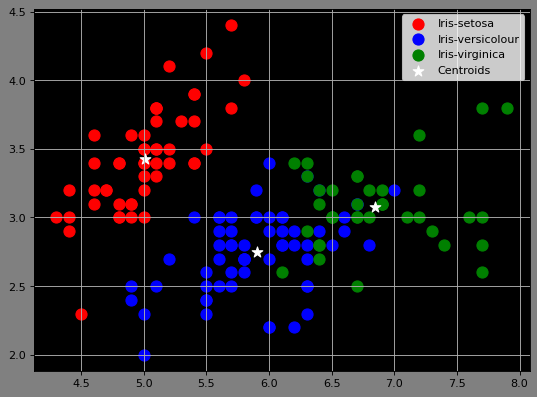

In [ ]:
plt.figure(facecolor='grey', figsize=(8, 6), dpi=80)
plt.axes().set_facecolor('black')

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'white', marker= '*', label = 'Centroids')

plt.grid()
plt.legend()